In [1]:
import random
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [2]:
root_dir = 'zbiory'
file_names = []
arrays = {}
classes = [0,1,2,3,4,5,6,7]
labels_true = {}
i=-1
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.npy'):
            file_path = os.path.join(subdir, file)
            file_name, _ = os.path.splitext(file)
            if file_name not in arrays:
                arrays[file_name] = []
                labels_true[file_name] = []
            array = np.load(file_path)
            arrays[file_name].append(np.load(file_path))
            labels_true[file_name].extend([classes[i]]*array.shape[0])
    i+=1
for file_name, data in arrays.items():
    arrays[file_name] = np.concatenate(data)

In [3]:
arrays.keys()

dict_keys(['x_32_32_kz_data', 'x_32_32_kz_data_2', 'x_32_32_mp4_data', 'x_32_32_mp4_data_2', 'x_64_64_kz_data', 'x_64_64_kz_data_2', 'x_64_64_mp4_data', 'x_64_64_mp4_data_2', 'y_32_32_kz_data', 'y_32_32_kz_data_2', 'y_32_32_mp4_data', 'y_32_32_mp4_data_2', 'y_64_64_kz_data', 'y_64_64_kz_data_2', 'y_64_64_mp4_data', 'y_64_64_mp4_data_2'])

In [17]:
agg = arrays['x_32_32_kz_data']
agg.shape

(2848, 32, 32)

In [42]:
y = labels_true['x_32_32_kz_data']

In [6]:
imgs = arrays['x_32_32_mp4_data']
imgs.shape

(62554, 32, 32, 3)

In [ ]:
j=0
images,labs=[],[]
for i in range(len(imgs)):
    print(j)
    if arrays['y_32_32_mp4_data'][i] == j:
        images.append(arrays['x_32_32_mp4_data'][i])
        labs.append(labels_true['x_32_32_mp4_data'][i])
        j+=1
        if j==4:
            j=0


In [66]:
img = imgs[0]

In [4]:
grays=[]
for img in imgs:
    _,img1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    grays.append(img1)

In [115]:
y = labels_true['x_32_32_kz_data']
y = np.array(y)

In [5]:
y1=labels_true['y_32_32_mp4_data']

In [6]:
grays  = np.array(grays)

In [7]:
grays = grays.reshape(2848,-1)

ValueError: cannot reshape array of size 192165888 into shape (2848,newaxis)

In [260]:
grays.shape

(2848, 32, 32)

In [162]:
new_data = np.reshape(grays, (712, 4, 1024))

In [163]:
new_data.shape

(712, 4, 1024)

In [160]:
agg_labels = []
for i,item in enumerate(y):
    if i%4 ==0:
     agg_labels.append(item)

In [161]:
agg_labels = np.array(agg_labels)
agg_labels.shape

(712,)

In [164]:
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(new_data,agg_labels , test_size=0.2, random_state=13)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=13)


In [165]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=8)
y_val = to_categorical(y_val, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)


In [169]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Load the training and testing data


# Define the model architecture
model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(4, 1024)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=8,
                    epochs=30,
                    validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/30
54/54 [==============================] - 3s 12ms/step - loss: 2.2546 - accuracy: 0.1408 - val_loss: 2.1412 - val_accuracy: 0.1189
Epoch 2/30
54/54 [==============================] - 0s 6ms/step - loss: 2.0371 - accuracy: 0.1831 - val_loss: 2.0995 - val_accuracy: 0.0979
Epoch 3/30
54/54 [==============================] - 0s 6ms/step - loss: 2.0099 - accuracy: 0.2300 - val_loss: 2.0782 - val_accuracy: 0.1399
Epoch 4/30
54/54 [==============================] - 0s 6ms/step - loss: 1.9984 - accuracy: 0.2019 - val_loss: 2.1101 - val_accuracy: 0.1469
Epoch 5/30
54/54 [==============================] - 0s 6ms/step - loss: 1.9817 - accuracy: 0.2066 - val_loss: 2.1006 - val_accuracy: 0.1189
Epoch 6/30
54/54 [==============================] - 0s 6ms/step - loss: 1.9793 - accuracy: 0.2300 - val_loss: 2.0798 - val_accuracy: 0.1608
Epoch 7/30
54/54 [==============================] - 0s 6ms/step - loss: 1.9520 - accuracy: 0.2347 - val_loss: 2.1161 - val_accuracy: 0.1678
Epoch 8/30
54/54 [=

In [152]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define your model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model and validate it after each epoch
history = model.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1,
                    validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy:', test_acc)


Epoch 1/20
107/107 [==============================] - 4s 22ms/step - loss: 5.2593 - accuracy: 0.4637 - val_loss: 0.9630 - val_accuracy: 0.6877
Epoch 2/20
107/107 [==============================] - 2s 18ms/step - loss: 1.1052 - accuracy: 0.6317 - val_loss: 0.7312 - val_accuracy: 0.7772
Epoch 3/20
107/107 [==============================] - 2s 16ms/step - loss: 0.8571 - accuracy: 0.7073 - val_loss: 0.7658 - val_accuracy: 0.7526
Epoch 4/20
107/107 [==============================] - 2s 16ms/step - loss: 0.7317 - accuracy: 0.7459 - val_loss: 0.5805 - val_accuracy: 0.8193
Epoch 5/20
107/107 [==============================] - 2s 18ms/step - loss: 0.5281 - accuracy: 0.8156 - val_loss: 0.5324 - val_accuracy: 0.8246
Epoch 6/20
107/107 [==============================] - 2s 16ms/step - loss: 0.4739 - accuracy: 0.8261 - val_loss: 0.4696 - val_accuracy: 0.8263
Epoch 7/20
107/107 [==============================] - 2s 16ms/step - loss: 0.3708 - accuracy: 0.8577 - val_loss: 0.5310 - val_accuracy: 0.8281

In [64]:
agg_labels = []
for i,item in enumerate(labelos):
    if i%4 ==0:
     agg_labels.append(item)

In [16]:
one_moment = []
tresh = 128
for sample,number in zip(arrays['x_32_32_mp4_data'],arrays['y_32_32_mp4_data']):

    if number == 1:
        #_, sample = cv2.threshold(sample, tresh, 255, cv2.THRESH_BINARY)
        one_moment.append(sample)


In [17]:
one_moment_labels = []
for sample,number in zip(labels_true['x_32_32_mp4_data'],arrays['y_32_32_mp4_data']):
    if number == 1:
        one_moment_labels.append(sample)

In [21]:
agg=agg.reshape(2848,-1)
agg.shape

(2848, 1024)

In [58]:
from sklearn.manifold import LocallyLinearEmbedding

#X = z.reshape(3036, -1)

lle = LocallyLinearEmbedding(n_components=10, method='standard')
X_lle = lle.fit_transform(agg)



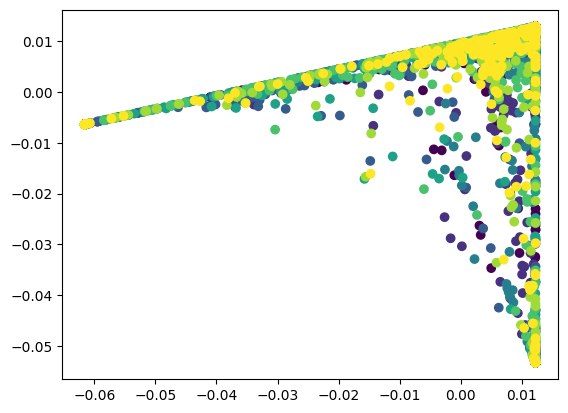

In [43]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y)

In [9]:
one_moment=grays

In [10]:
one_moment = one_moment.reshape(one_moment.shape[0],-1)


In [252]:
one_moment_labels= np.array(y1)

In [11]:
one_moment.shape

(62554, 3072)

In [72]:
agg_labels = np.array(agg_labels)

In [73]:
n_samples = one_moment.shape[0]
indices = np.arange(n_samples)

# Shuffle the indices
np.random.shuffle(indices)

# Use the shuffled indices to index into the data arrays
one_moment = one_moment[indices]
agg_labels = agg_labels[indices]

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=100, method='standard')
one = lle.fit_transform(one_moment)


MemoryError: Unable to allocate 29.2 GiB for an array with shape (62554, 62554) and data type float64

In [98]:

one_moment = (one_moment - one_moment.mean(axis=0)) / one_moment.std(axis=0)

# Step 3: Create the PCA model
pca = PCA(n_components=0.95)
# Step 4: Fit the model to the data
pca.fit(agg)

# Step 5: Transform the data
X_pca = pca.transform(agg)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, _, _ = train_test_split(X_pca,X_pca , test_size=0.7, random_state=13)

In [61]:
model = GaussianMixture(n_components=8)
labels = model.fit_predict(X_lle)

In [59]:
model = SpectralClustering(n_clusters=8, affinity='nearest_neighbors')
labels = model.fit_predict(X_lle)


In [65]:
nmi = silhouette_score(X_lle,labels)
rand = adjusted_rand_score(y,labels)
print("Silhouette Score:", nmi)
print("Rand Score:", rand)

Silhouette Score: 0.0046741934057121515
Rand Score: 0.7794679891705442


In [ ]:
n_comps = [1,2,10,20,40,100,200,400]
Xs,gauss_labels,spectral_labels = [],[],[]
for n in n_comps:
    lle = LocallyLinearEmbedding(n_components=n, method='standard')
    X_lle = lle.fit_transform(agg)
    model = GaussianMixture(n_components=3)
    labels= model.fit_predict(X_lle)
    model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
    labels1 = model.fit_predict(X_lle)
    Xs.append(X_lle)
    gauss_labels.append(labels)
    spectral_labels.append(labels1)

In [123]:
for X,gauss,spectral in zip(Xs,gauss_labels,spectral_labels):
    nmi = silhouette_score(X,gauss)
    ad = adjusted_mutual_info_score(y,gauss)
    rand = adjusted_rand_score(y,gauss)
    nmi1 = silhouette_score(X,spectral)
    rand1 = adjusted_rand_score(y,spectral)
    ad1 = adjusted_mutual_info_score(y,spectral)
    print('Gauss:','\nS:',nmi,'\nR:',rand,'\nM:',ad)
    print('Spectral:','\nS:',nmi1,'\nR:',rand1,'\nM:',ad1)


Gauss: 
S: 0.7165623158217556 
R: 0.005965408192735156 
M: 0.026732120545521414
Spectral: 
S: 0.3626724606568996 
R: 0.02064345994783785 
M: 0.031460058693269885
Gauss: 
S: 0.583439109773575 
R: 0.01093622134760239 
M: 0.027264599431397328
Spectral: 
S: 0.6826425812659174 
R: 0.0008519002867018102 
M: 0.011606642246585735
Gauss: 
S: 0.139410780083738 
R: 0.018447257228171855 
M: 0.025019354464590273
Spectral: 
S: 0.06768116892737536 
R: 0.00046488985834050584 
M: 0.009502594348877421
Gauss: 
S: 0.09239271410544835 
R: 0.016244262414628976 
M: 0.022501862414755467
Spectral: 
S: -0.03901265483957407 
R: 0.007565657332666421 
M: 0.021520825530349123
Gauss: 
S: 0.022259663412520687 
R: 0.00955724670265214 
M: 0.01373221817858455
Spectral: 
S: -0.13842798336133783 
R: 0.008706341779040418 
M: 0.01844961651994493
Gauss: 
S: 0.004227839179260591 
R: 0.009194300214501327 
M: 0.01308713040506354
Spectral: 
S: -0.17393063163754102 
R: 0.009086350093956322 
M: 0.01939049032113458
Gauss: 
S: -0.01

In [103]:
import numpy as np

def compute_similarity_matrix(data):
    similarity_matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(i, data.shape[0]):
            similarity = np.linalg.norm(data[i] - data[j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity
    return similarity_matrix

data = agg
similarity_matrix = compute_similarity_matrix(data)

In [104]:
import numpy as np

def compute_laplacian(similarity_matrix):
    degrees = np.sum(similarity_matrix, axis=1)
    D = np.diag(degrees)
    L = D - similarity_matrix
    return L


L = compute_laplacian(similarity_matrix)

In [127]:
import numpy as np

def estimate_num_clusters(L, threshold=0.95):
    eigenvalues, _ = np.linalg.eigh(L)
    eigenvalues = np.sort(eigenvalues)
    num_clusters = np.sum(eigenvalues > threshold * eigenvalues[-1])
    return num_clusters,eigenvalues

num_clusters,eigenvalues = estimate_num_clusters(L)

In [128]:
num_clusters

5

In [125]:
eigenvalues

array([2.32451734e-10, 2.59673769e+06, 2.72093170e+06, ...,
       1.63258185e+07, 1.64047037e+07, 1.64610878e+07])

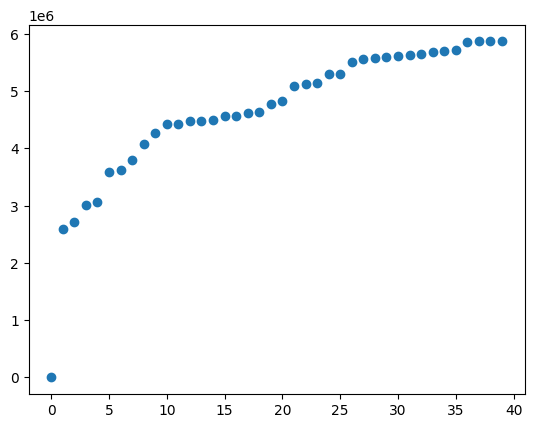

In [132]:
plt.scatter(range(40),eigenvalues[:40])